**Aim**:

Predicting the game can be bought(RECOMMENDED) or not(DON'T BUY) by the reviews in the given dataset 

using Spacy 

In [5]:
from google.colab import files
upload=files.upload()

Saving steamreviews (1).zip to steamreviews (1) (1).zip


In [8]:
!unzip steamreviews\ \(1\)\ \(1\).zip

Archive:  steamreviews (1) (1).zip
  inflating: train.csv               


In [115]:
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
import random

filterwarnings('ignore')
sns.set(style='darkgrid')
sns.set(font_scale=1.3)

In [116]:
data=pd.read_csv('train.csv')
data.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [117]:
data.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [118]:
my_data=data[['user_review','user_suggestion']].dropna()
my_data.count()

user_review        17494
user_suggestion    17494
dtype: int64

In [119]:
my_data.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [120]:
my_data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

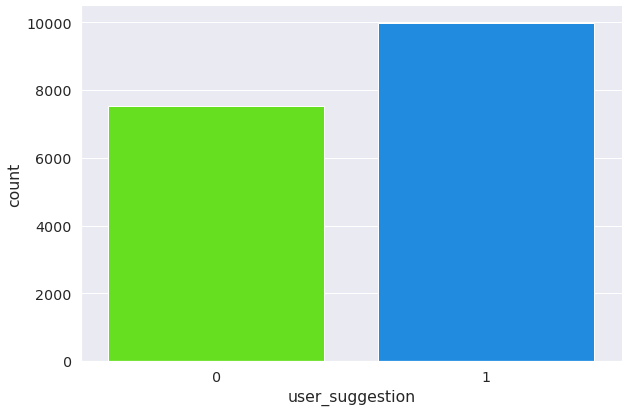

In [121]:
sns.factorplot(x='user_suggestion',data=my_data,kind='count',size=6,aspect=1.5,palette='gist_rainbow')

In [122]:
#!spacy download en_core_web_md 

In [123]:
nlp=spacy.load('en_core_web_sm')
nlp.pipe_names

['tagger', 'parser', 'ner']

SpaCy makes custom text classification structured and convenient through the textcat component. Text classification is often used in situations like segregating movie reviews, hotel reviews, news data, primary topic of the text, classifying customer support emails based on complaint type etc.

In [124]:
textcat=nlp.create_pipe('textcat',config={'exclusive_classes':True,'architecture':'bow'})
nlp.add_pipe(textcat,last=True)
nlp.pipe_names

['tagger', 'parser', 'ner', 'textcat']

RECOMMENDED Label for buying the game DON'T BUY Label for don't buy the game

In [125]:
textcat.add_label('RECOMMENDED')
textcat.add_label("DON'T BUY")

1

In [126]:
my_data['tuples']=data.apply(lambda x:(x['user_review'],x['user_suggestion']),axis=1)
training_data=my_data['tuples'].tolist()
training_data[:10]

[("I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",
  1),
 ("Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bo

In [127]:
import random

def load_data(limit=0, split=0.8):
    train_data=training_data
    random.shuffle(train_data)
    texts, labels = zip(*train_data)
    cats = [{"RECOMMENDED": bool(y), "DONT'T BUY": not bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])


In [128]:
n_texts=13995
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
train_data[:10]

[("Early Access ReviewGreat sandbox game with easy to learn controls and mechanics. easy enough to farm resources and doesn't take too long to get what you need - although starting off is obviously slow to start as is every game. learn the blocks and craft your armour and weapons, build a fort and farm the creatures, start a farm of animals and veg then create your wonders of the world. start a community or explore servers to join one, the world is your oyster.",
  {'cats': {"DONT'T BUY": False, 'RECOMMENDED': True}}),
 ('It\'s fairly new, and I\'ve only played about an hour of it, but I really enjoy this. And I usually don\'t enjoy trading card-style games. It\'s somewhere between MTG, Hearthstone and Gwent. It has the 2 color mechanic from MTG, Lanes from Gwent, Polish, card-forging system and turn-growing Magicka (Magicka) from heathstone with an engrossing and full singleplayer campaign, Elder Scrolls Lore, its own spin on Trading card games and a lot of polish.PROS:-"Free"-Good St

In [129]:
from spacy.util import minibatch, compounding
n_iter=4
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
with nlp.disable_pipes(*other_pipes):  
    optimizer = nlp.begin_training()

    print("Training the model...")

    for i in range(n_iter):
        losses = {}
        batches = minibatch(train_data, size=compounding(4., 32., 1.001))
        for batch in batches:
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, drop=0.2,losses=losses)

Training the model...


In [130]:
review="the game was boring and we did not have any fun at all - I was very much so dissapointed"
doc=nlp(review)
doc.cats 

{"DON'T BUY": 0.8032869696617126, 'RECOMMENDED': 0.19671300053596497}

In [131]:
new_review="best exciting flight simulator EVER!!!!!"
doc=nlp(new_review)
doc.cats 

{"DON'T BUY": 0.025572920218110085, 'RECOMMENDED': 0.9744271039962769}

In [132]:
new_review="wow it was awesome!!!! i showed all my friends!! i did not regret spending money on this game!"
doc=nlp(new_review)
doc.cats 

{"DON'T BUY": 0.051200661808252335, 'RECOMMENDED': 0.9487993121147156}

In [133]:
new_review="It is not a good game, we thought we would have more fun but it was too long and we never finished till the end. I admit it was more fun than the first part reeased last year"
doc=nlp(new_review)
doc.cats 

{"DON'T BUY": 0.6132491827011108, 'RECOMMENDED': 0.38675081729888916}